### Importing Required Modules

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score

from MakeDataset_tsfel import *
from MakeDataset import *

Training TSFEL data shape:  (108, 1, 384)
Testing TSFEL data shape:  (72, 1, 384)
Training TSFEL data shape:  (108,)
Testing TSFEL data shape:  (72,)
Feature List Size:  384
Training Raw data shape:  (108, 500, 3)
Testing Raw data shape:  (72, 500, 3)


### Creating Global Variables and Functions

In [2]:
label_names = ["LAY","SIT","STAND","WALK","WALK_DW","WALK_UP"]
accuracy_score_raw = []
accuracy_score_tsfel = []
accuracy_label = ["DecisionTreeClassifier", "RandomForestClassifier", "LinearRegressionClassifier"]

### Raw Implementation of DT, RF and LinearRegression

In [3]:
print("Displaying Training and Testing Data and Label Shapes")
print("Training data shape: ",X_train.shape)
print("Training label shape: ",y_train.shape)
print("Testing data shape: ",X_test.shape)
print("Testing label shape: ",y_test.shape)

Displaying Training and Testing Data and Label Shapes
Training data shape:  (108, 500, 3)
Training label shape:  (108,)
Testing data shape:  (72, 500, 3)
Testing label shape:  (72,)


#### Decision Tree on Raw Data

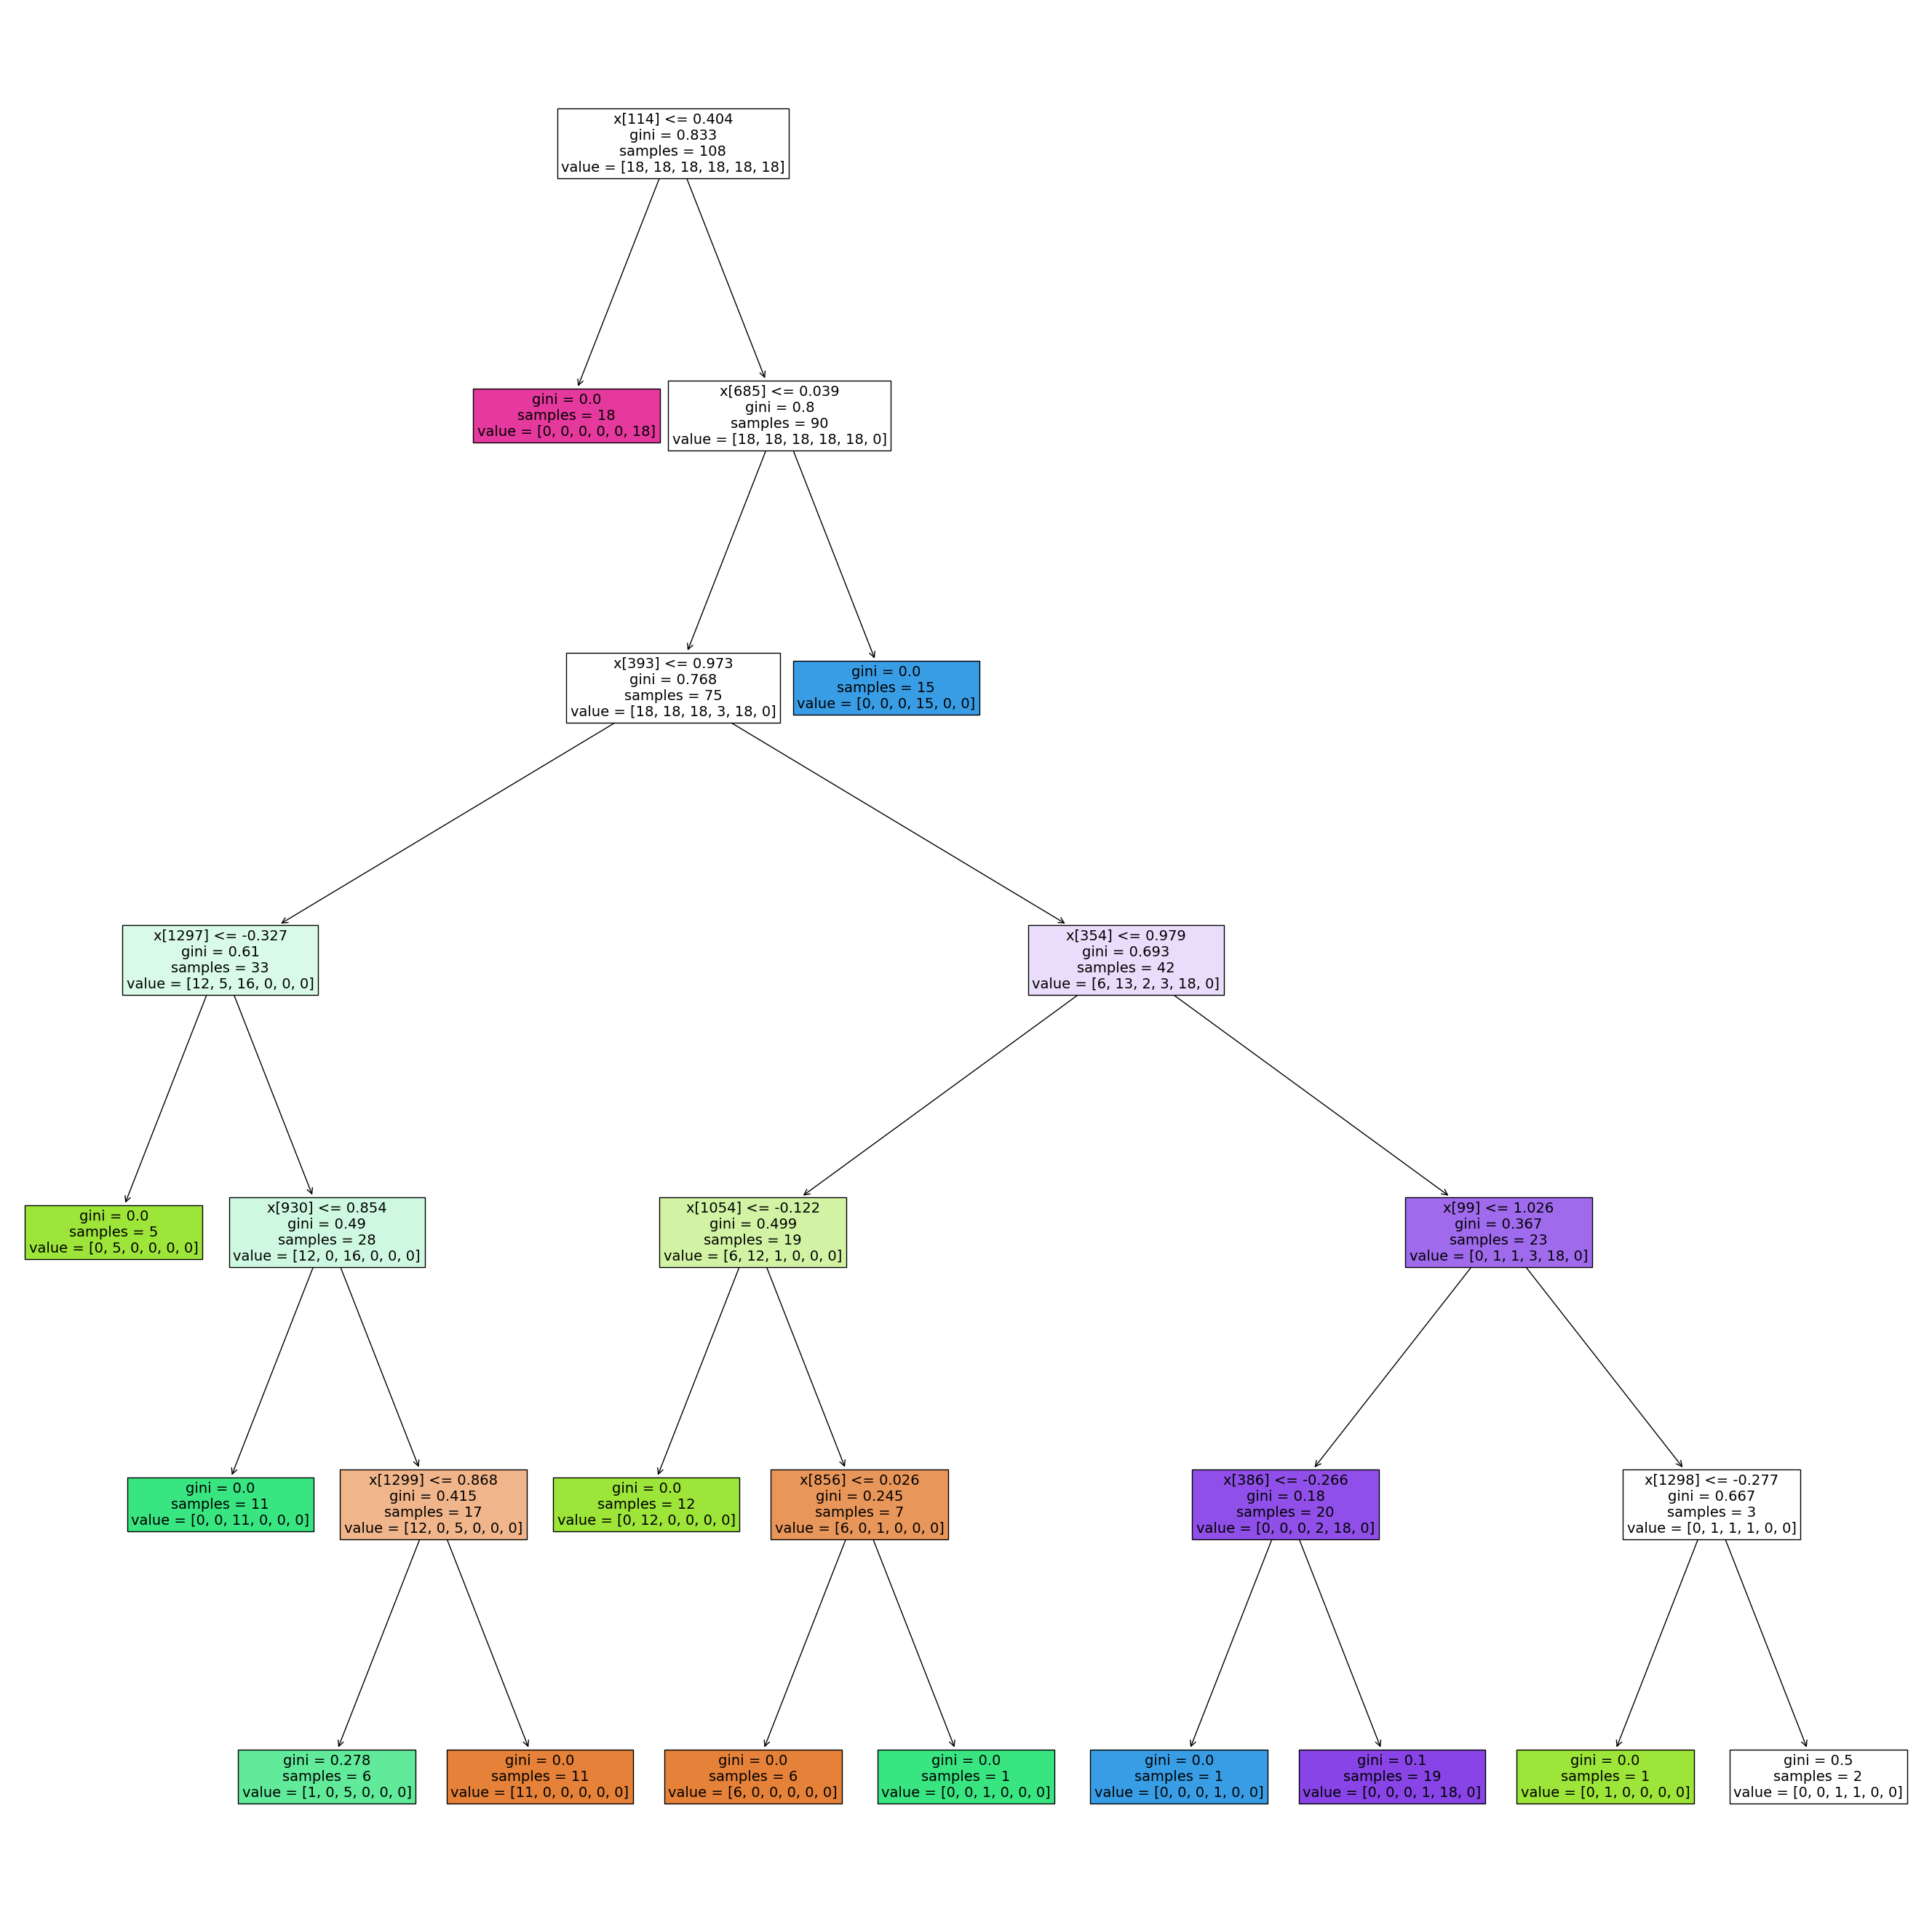

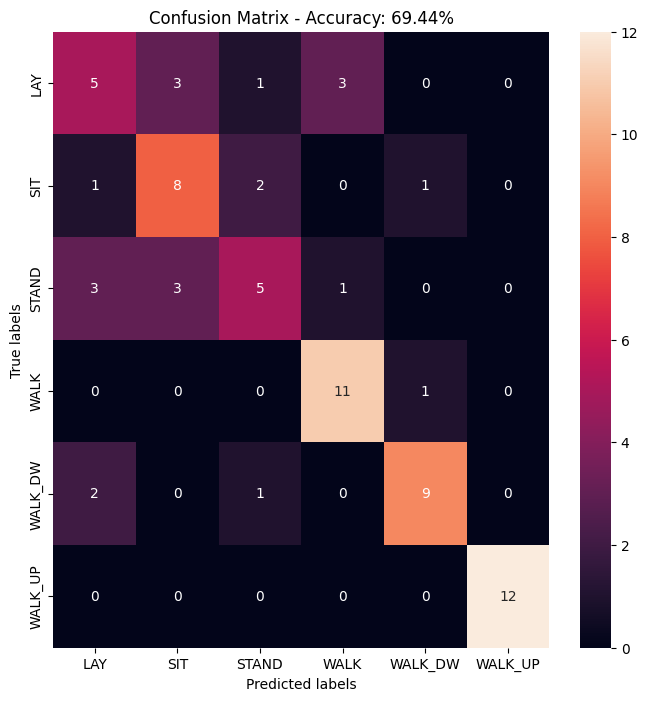

In [4]:
dt_raw = DecisionTreeClassifier(max_depth=6)

xtrain_dt_raw = X_train.reshape(108,1500)
ytrain_dt_raw = y_train

dt_raw.fit(xtrain_dt_raw, ytrain_dt_raw)

yPred_dt_raw = dt_raw.predict(X_test.reshape(72,1500))

# Plotting the Decision Tree for Raw Data
plt.figure(figsize=(34,34))
plot_tree(dt_raw, filled=True, fontsize=14)
plt.savefig("./Figures/Q6.DecisionTree_Raw.pdf", bbox_inches='tight')
plt.show()

# Plotting the Confusion Matrix for Raw Data
cm = confusion_matrix(y_test, yPred_dt_raw, labels=[1,2,3,4,5,6])

plt.figure(figsize=(8,8))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Accuracy: {:.2f}%'.format(accuracy_score(y_test, yPred_dt_raw)*100))

ax.xaxis.set_ticklabels(label_names) # type: ignore
ax.yaxis.set_ticklabels(label_names) # type: ignore

plt.savefig("./Figures/Q6.DecisionTree_Raw_ConfusionMatrix.pdf", bbox_inches='tight')
plt.show()

accuracy_score_raw.append(accuracy_score(y_test, yPred_dt_raw))

#### Random Forest on Raw Data

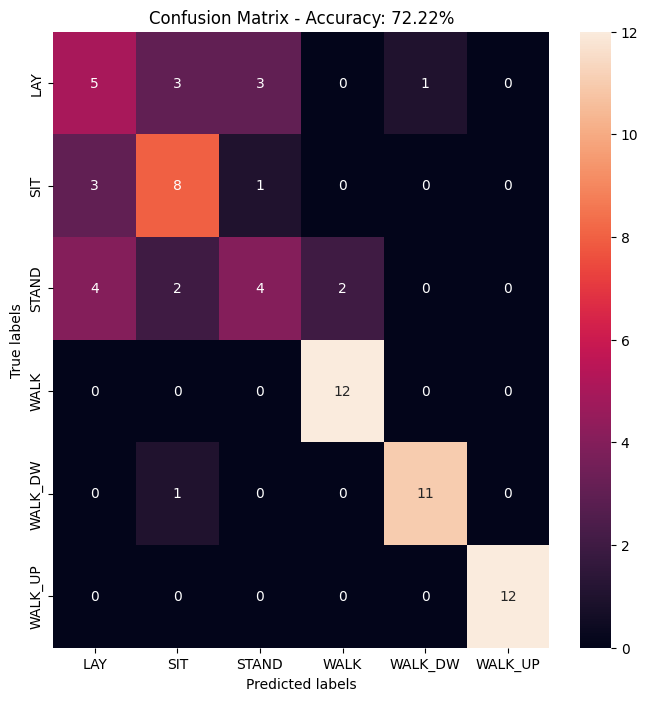

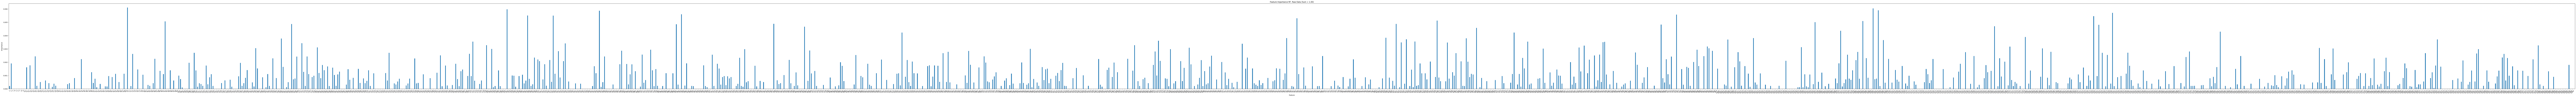

Top 10 Features with Max Importance on Raw data for Random Forest:
70
1091
292
1094
346
1231
394
976
304
319


In [5]:
rf_raw = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=0)

xtrain_rf_raw = X_train.reshape(108,1500)
ytrain_rf_raw = y_train

rf_raw.fit(xtrain_rf_raw, ytrain_rf_raw)

yPred_rf_raw = rf_raw.predict(X_test.reshape(72,1500))

# Plotting the Confusion Matrix for Raw Data with Random Forest
cm = confusion_matrix(y_test, yPred_rf_raw, labels=[1,2,3,4,5,6])

plt.figure(figsize=(8,8))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Accuracy: {:.2f}%'.format(accuracy_score(y_test, yPred_rf_raw)*100))

ax.xaxis.set_ticklabels(label_names) # type: ignore
ax.yaxis.set_ticklabels(label_names) # type: ignore

plt.savefig("./Figures/Q6.RandomForest_Raw_ConfusionMatrix.pdf", bbox_inches='tight')
plt.show()

accuracy_score_raw.append(accuracy_score(y_test, yPred_rf_raw))

# Bar plot of the feature importances for raw data with Random Forest
plt.figure(figsize=(300,10))
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance RF- Raw Data (Sum = {:.2f})'.format(sum(rf_raw.feature_importances_)))
plt.xticks(range(1, 3001, 2), range(1, 1501, 1))
plt.xticks(rotation=45)
plt.xlim(0,3002)
plt.bar(range(1,3001,2), rf_raw.feature_importances_)
plt.savefig("./Figures/Q7.RandomForest_Raw_FeatureImportance.pdf", bbox_inches='tight')
plt.show()

# Details of Top 10 features with max importance on Raw data for Random Forest
feature_coeff_pairs = list(zip(range(1, 1501), rf_raw.feature_importances_))
sorted_feature_coeff_pairs = sorted(feature_coeff_pairs, key=lambda x: x[1], reverse=True)
print("Top 10 Features with Max Importance on Raw data for Random Forest:")
for i in range(10):
    print(sorted_feature_coeff_pairs[i][0])

#### Linear Regression on Raw Data

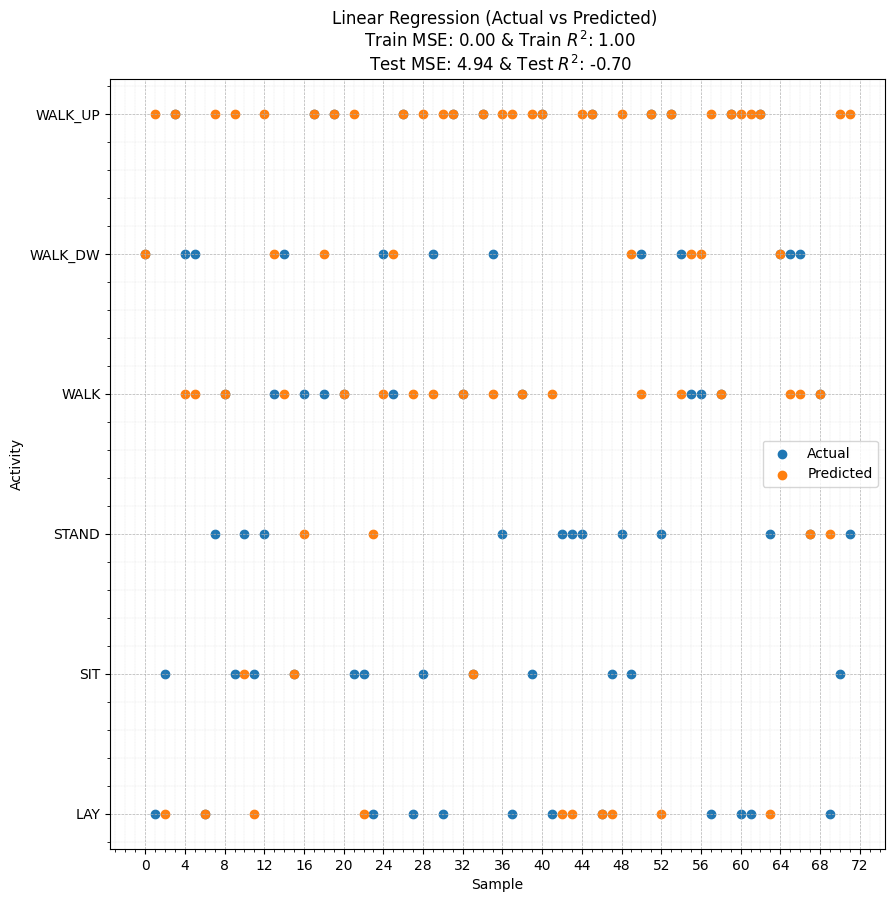

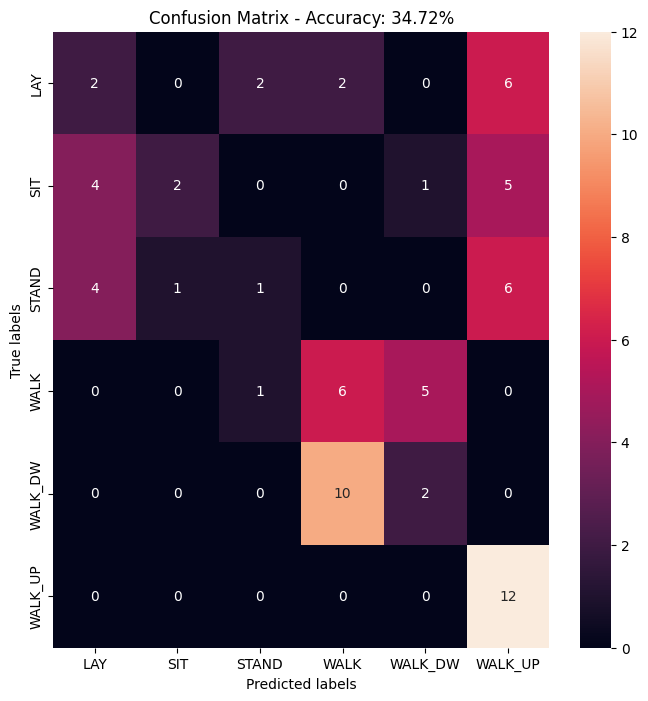

Sum of Coefficients:  540.9653063464301
Sum of Normalised Coefficients:  0.9999999999999987


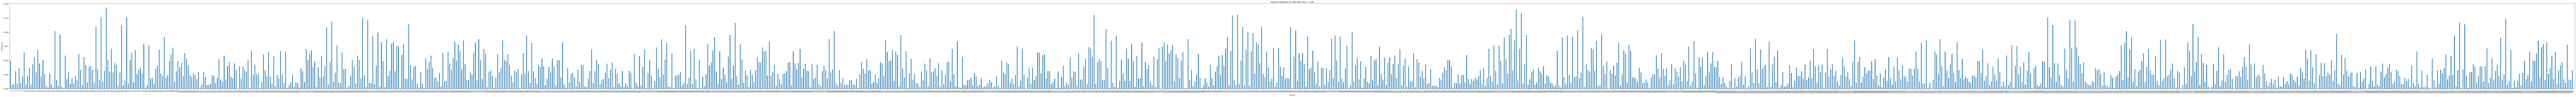

Top 10 Weights with Max Importance on Raw data for Linear Regression:
57
882
885
719
635
716
921
54
1193
69


In [6]:
lin_reg_raw = LinearRegression()

xtrain_lr_raw = X_train.reshape(108,1500)
ytrain_lr_raw = y_train

lin_reg_raw.fit(xtrain_lr_raw, ytrain_lr_raw)

# Clipping predictions to the range of 1 to 6
yHatTrain_lr_raw = lin_reg_raw.predict(xtrain_lr_raw)
yHatTrain_lr_raw = np.clip(yHatTrain_lr_raw, 1, 6)
yHatTrain_lr_raw = np.around(yHatTrain_lr_raw)

yHatTest_lr_raw = lin_reg_raw.predict(X_test.reshape(72,1500))
yHatTest_lr_raw = np.clip(yHatTest_lr_raw, 1, 6)
yHatTest_lr_raw = np.around(yHatTest_lr_raw)

# Plotting the predicted and actual values for Linear Regression on Raw Data
plt.figure(figsize=(10,10))
plt.scatter(range(72), y_test, label='Actual')
plt.scatter(range(72), yHatTest_lr_raw, label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Activity')
plt.title('Linear Regression (Actual vs Predicted) \n Train MSE: {:.2f} & Train $R^2$: {:.2f} \n Test MSE: {:.2f} & Test $R^2$: {:.2f}'.format(mean_squared_error(ytrain_lr_raw, yHatTrain_lr_raw), r2_score(ytrain_lr_raw, yHatTrain_lr_raw), mean_squared_error(y_test, yHatTest_lr_raw), r2_score(y_test, yHatTest_lr_raw)))
plt.legend()   
plt.yticks([1,2,3,4,5,6], label_names)
plt.xticks(range(0,73,4))
plt.minorticks_on()
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.grid(True, which='minor', linestyle=':', linewidth=0.2)
plt.savefig("./Figures/Q6.LinearRegression_Raw_ActualVsPredicted.pdf", bbox_inches='tight')
plt.show()

# Plotting the Confusion Matrix for Linear Regression on Raw Data
cm = confusion_matrix(y_test, yHatTest_lr_raw, labels=[1,2,3,4,5,6])

plt.figure(figsize=(8,8))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Accuracy: {:.2f}%'.format(accuracy_score(y_test, yHatTest_lr_raw)*100))

ax.xaxis.set_ticklabels(label_names) # type: ignore
ax.yaxis.set_ticklabels(label_names) # type: ignore

plt.savefig("./Figures/Q6.LinearRegression_Raw_ConfusionMatrix.pdf", bbox_inches='tight')
plt.show()

accuracy_score_raw.append(accuracy_score(y_test, yHatTest_lr_raw))

# Feature Importance for Linear Regression on Raw Data with Normalisation
coeff_lr = abs(lin_reg_raw.coef_)
coeff_lr_sum = sum(coeff_lr)
coeff_lr_norm = np.zeros(1500)

for i in range(1500):
    coeff_lr_norm[i] = coeff_lr[i]/coeff_lr_sum

coeff_lr_sum_norm = sum(coeff_lr_norm)
print("Sum of Coefficients: ", coeff_lr_sum)
print("Sum of Normalised Coefficients: ", coeff_lr_sum_norm)

# Bar plot of the feature importances for raw data with Linear Regression
plt.figure(figsize=(300,10))
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance LR- Raw Data (Sum = {:.2f})'.format(coeff_lr_sum_norm))
plt.xticks(range(1, 3001, 2), range(1, 1501, 1))
plt.xticks(rotation=45)
plt.xlim(0,3002)
plt.bar(range(1,3001, 2), coeff_lr_norm)
plt.savefig("./Figures/Q7.LinearRegression_Raw_FeatureImportance.pdf", bbox_inches='tight')
plt.show()

# Details of Top 10 Weights with max importance on Raw data for Linear Regression
feature_coeff_pairs = list(zip(range(1, 1501), coeff_lr_norm))
sorted_feature_coeff_pairs = sorted(feature_coeff_pairs, key=lambda x: x[1], reverse=True)
print("Top 10 Weights with Max Importance on Raw data for Linear Regression:")
for i in range(10):
    print(sorted_feature_coeff_pairs[i][0])

### TSFEL Implementation of DT, RF and LinearRegression

In [7]:
print("Training data shape: ",X_train_tsfel.shape)
print("Training label shape: ",y_train_tsfel.shape)
print("Testing data shape: ",X_test_tsfel.shape)
print("Testing label shape: ",y_test_tsfel.shape)

Training data shape:  (108, 1, 384)
Training label shape:  (108,)
Testing data shape:  (72, 1, 384)
Testing label shape:  (72,)


#### Decision Tree on TSFEL Data

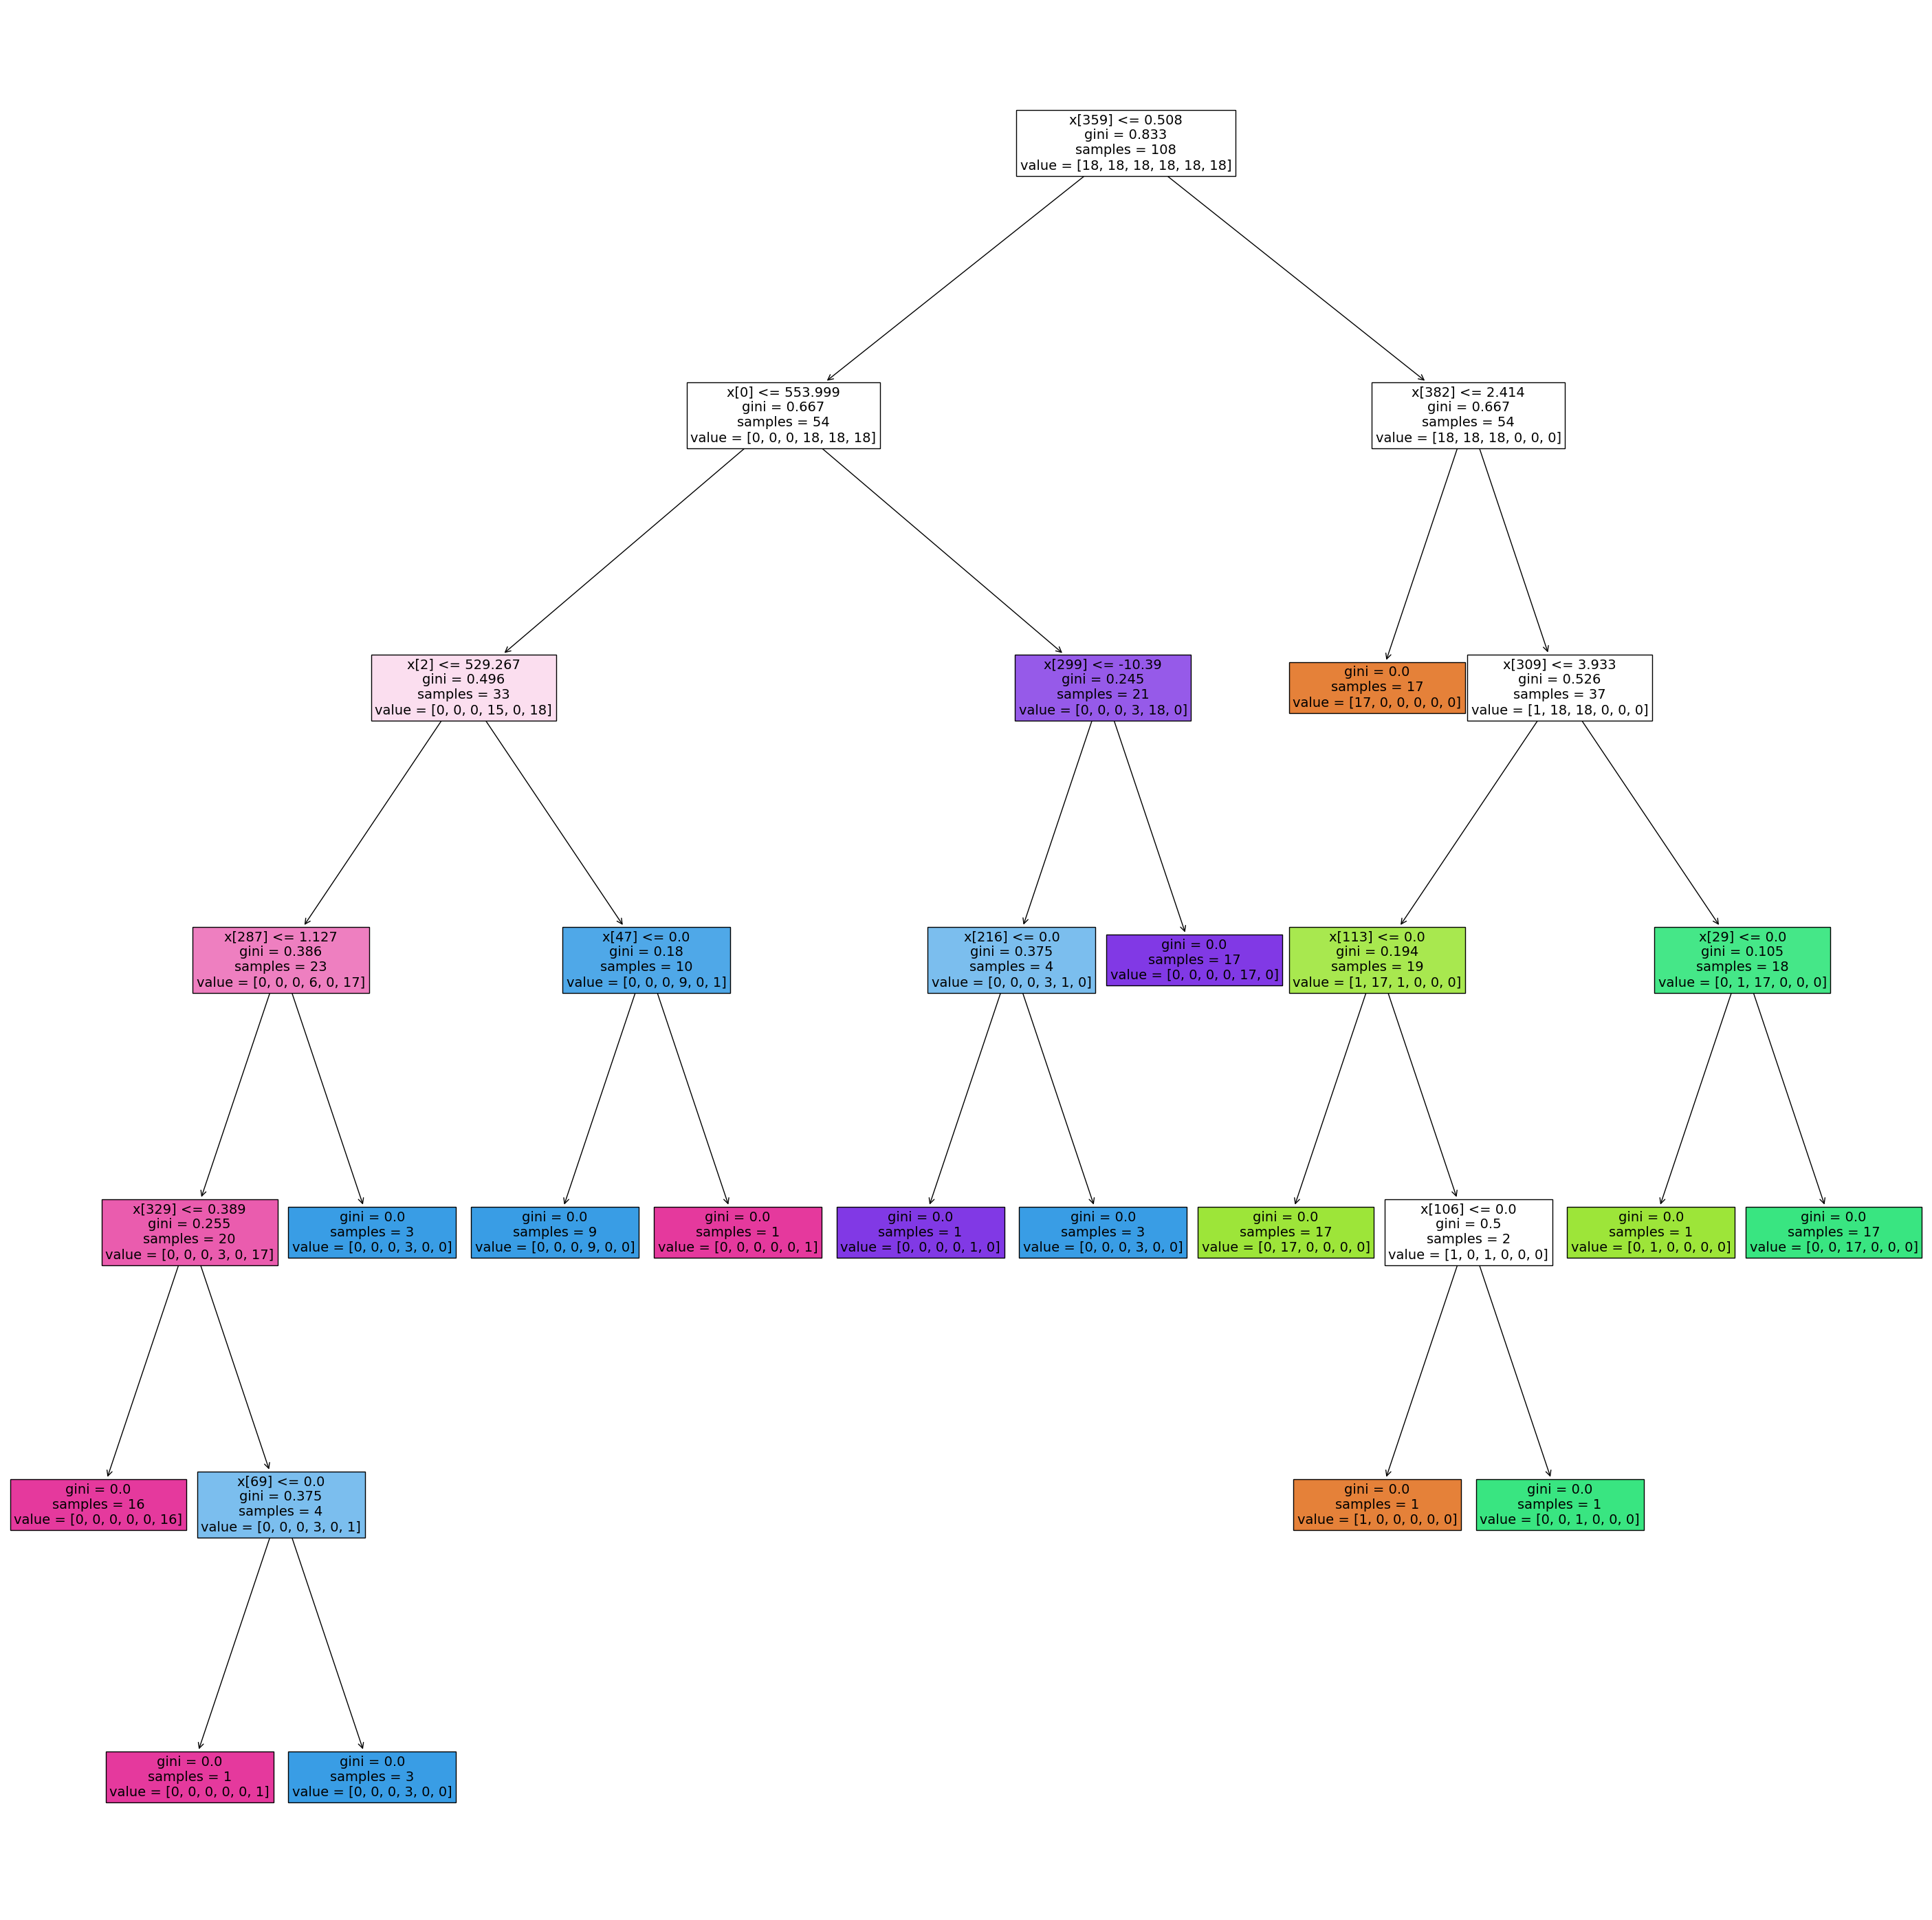

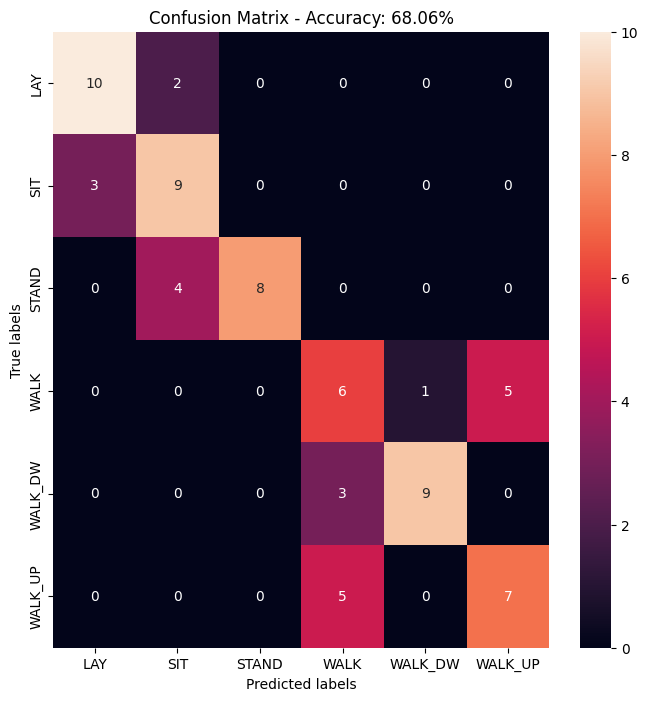

In [8]:
dt_tsfel = DecisionTreeClassifier(max_depth=6)

xtrain_dt_tsfel = X_train_tsfel.reshape(108,384)
ytrain_dt_tsfel = y_train_tsfel

dt_tsfel.fit(xtrain_dt_tsfel, ytrain_dt_tsfel)

yPred_dt_tsfel = dt_tsfel.predict(X_test_tsfel.reshape(72,384))

# Plotting the Decision Tree for TSFEL Data
plt.figure(figsize=(36,36))
plot_tree(dt_tsfel, filled=True, fontsize=14)
plt.savefig("./Figures/Q6.DecisionTree_TSFEL.pdf", bbox_inches='tight')
plt.show()

# Plotting the Confusion Matrix for TSFEL Data
cm = confusion_matrix(y_test_tsfel, yPred_dt_tsfel, labels=[1,2,3,4,5,6])

plt.figure(figsize=(8,8))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Accuracy: {:.2f}%'.format(accuracy_score(y_test_tsfel, yPred_dt_tsfel)*100))

ax.tick_params(axis='x', labelsize=10) 
ax.tick_params(axis='y', labelsize=10) 

ax.xaxis.set_ticklabels(label_names) # type: ignore
ax.yaxis.set_ticklabels(label_names) # type: ignore

plt.savefig("./Figures/Q6.DecisionTree_TSFEL_ConfusionMatrix.pdf", bbox_inches='tight')
plt.show()

accuracy_score_tsfel.append(accuracy_score(y_test_tsfel, yPred_dt_tsfel))

#### Random Forest on TSFEL Data

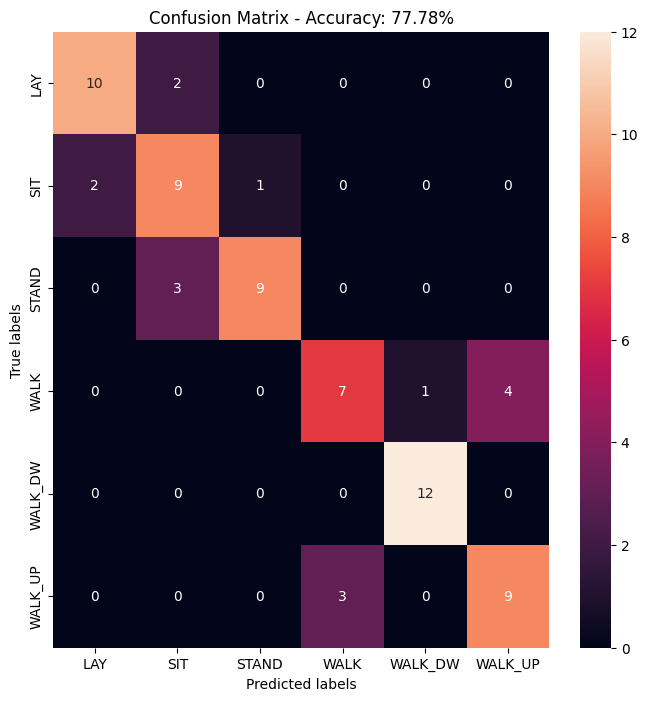

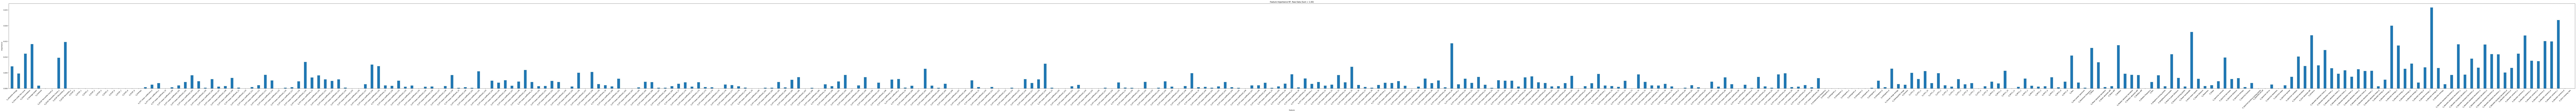

Top 10 Features with Max Importance on TSFEL data for Random Forest:
0_Wavelet energy_8
0_Wavelet variance_8
0_Wavelet energy_2
0_Root mean square
0_Variance
0_Wavelet variance_3
0_Wavelet variance_6
0_Wavelet variance_7
0_ECDF Percentile_1
0_FFT mean coefficient_5


In [9]:
rf_tsfel = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=0)

xtrain_rf_tsfel = X_train_tsfel.reshape(108,384)
ytrain_rf_tsfel = y_train_tsfel

rf_tsfel.fit(xtrain_rf_tsfel, ytrain_rf_tsfel)

yPred_rf_tsfel = rf_tsfel.predict(X_test_tsfel.reshape(72,384))

# Plotting the Confusion Matrix for TSFEL Data with Random Forest
cm = confusion_matrix(y_test_tsfel, yPred_rf_tsfel, labels=[1,2,3,4,5,6])

plt.figure(figsize=(8,8))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Accuracy: {:.2f}%'.format(accuracy_score(y_test_tsfel, yPred_rf_tsfel)*100))

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

ax.xaxis.set_ticklabels(label_names) # type: ignore
ax.yaxis.set_ticklabels(label_names) # type: ignore

plt.savefig("./Figures/Q6.RandomForest_TSFEL_ConfusionMatrix.pdf", bbox_inches='tight')
plt.show()

accuracy_score_tsfel.append(accuracy_score(y_test_tsfel, yPred_rf_tsfel))

# Bar plot of the feature importances for TSFEL data with Random Forest
plt.figure(figsize=(300,10))
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance RF- Raw Data (Sum = {:.2f})'.format(sum(rf_tsfel.feature_importances_)))
plt.xticks(range(1,769,2), feature_names_tsfel)
plt.xticks(rotation=45)
plt.xlim(0,770)
plt.bar(range(1, 769, 2), rf_tsfel.feature_importances_)
plt.savefig("./Figures/Q7.RandomForest_TSFEL_FeatureImportance.pdf", bbox_inches='tight')
plt.show()

# Details of Top 10 features with max importance on TSFEL data for Random Forest
feature_importance_pairs = list(zip(feature_names_tsfel, rf_tsfel.feature_importances_))
sorted_feature_importance_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)
print("Top 10 Features with Max Importance on TSFEL data for Random Forest:")
for i in range(10):
    print(sorted_feature_importance_pairs[i][0])

#### Linear Regression on TSFEL Data

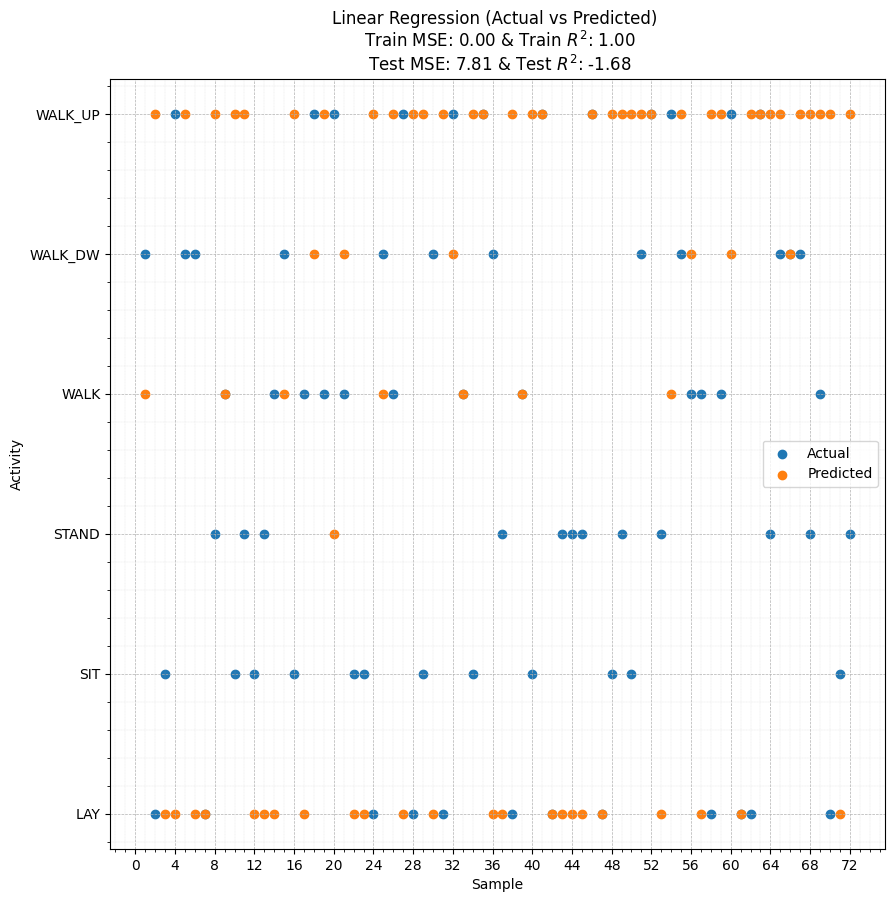

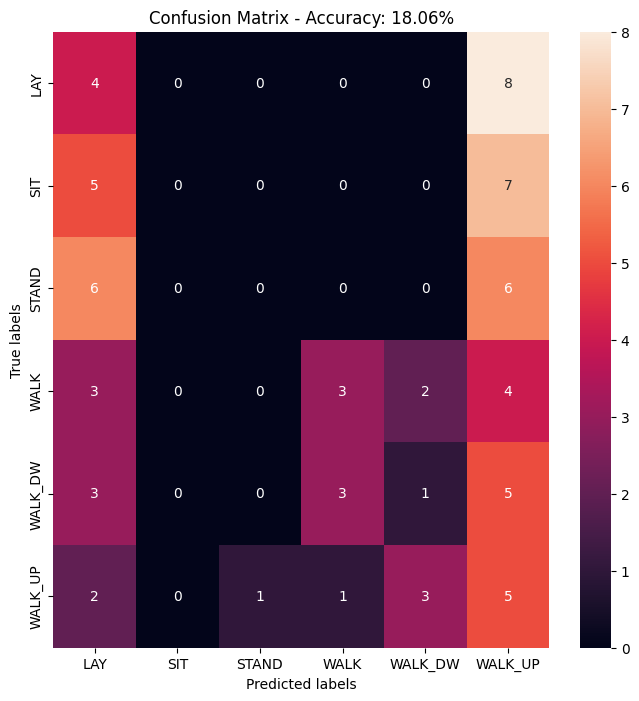

Sum of Coefficients:  60714.708348554705
Sum of Normalised Coefficients:  1.000000000000001


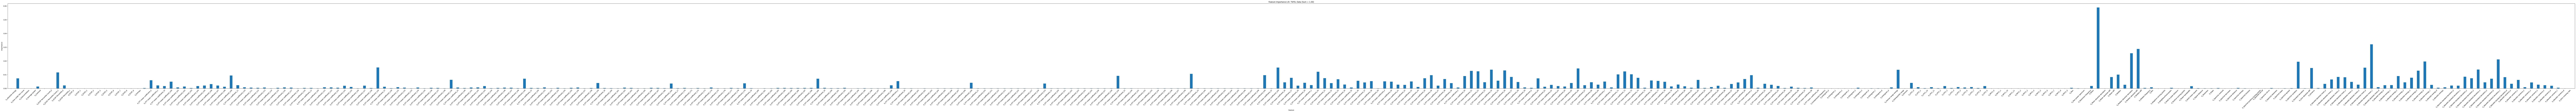

Top 10 Weights with Max Importance on TSFEL data for Linear Regression:
0_Mean absolute deviation
0_Wavelet absolute mean_8
0_Median diff
0_Median absolute diff
0_Wavelet standard deviation_8
0_Wavelet energy_7
0_Standard deviation
0_FFT mean coefficient_13
0_FFT mean coefficient_26
0_Wavelet absolute mean_7


In [10]:
lin_reg_tsfel = LinearRegression()

xtrain_lr_tsfel = X_train_tsfel.reshape(108,384)
ytrain_lr_tsfel = y_train_tsfel

lin_reg_tsfel.fit(xtrain_lr_tsfel, ytrain_lr_tsfel)

# Clipping predictions to the range of 1 to 6
yHatTrain_lr_tsfel = lin_reg_tsfel.predict(xtrain_lr_tsfel)
yHatTrain_lr_tsfel = np.clip(yHatTrain_lr_tsfel, 1, 6)
yHatTrain_lr_tsfel = np.around(yHatTrain_lr_tsfel)

yHatTest_lr_tsfel = lin_reg_tsfel.predict(X_test_tsfel.reshape(72,384))
yHatTest_lr_tsfel = np.clip(yHatTest_lr_tsfel, 1, 6)
yHatTest_lr_tsfel = np.around(yHatTest_lr_tsfel)

# Plotting the predicted and actual values for Linear Regression on TSFEL Data
plt.figure(figsize=(10,10))
plt.scatter(range(1, 73), y_test_tsfel, label='Actual')
plt.scatter(range(1, 73), yHatTest_lr_tsfel, label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Activity')
plt.title('Linear Regression (Actual vs Predicted) \n Train MSE: {:.2f} & Train $R^2$: {:.2f} \n Test MSE: {:.2f} & Test $R^2$: {:.2f}'.format(mean_squared_error(ytrain_lr_tsfel, yHatTrain_lr_tsfel), r2_score(ytrain_lr_tsfel, yHatTrain_lr_tsfel), mean_squared_error(y_test_tsfel, yHatTest_lr_tsfel), r2_score(y_test_tsfel, yHatTest_lr_tsfel)))
plt.legend()   
plt.yticks([1,2,3,4,5,6], ["LAY","SIT","STAND","WALK","WALK_DW","WALK_UP"])
plt.xticks(range(0,73,4))
plt.minorticks_on()
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.grid(True, which='minor', linestyle=':', linewidth=0.2)
plt.savefig("./Figures/Q6.LinearRegression_TSFEL_ActualVsPredicted.pdf", bbox_inches='tight')
plt.show()

# Plotting the Confusion Matrix for Linear Regression on TSFEL Data
cm = confusion_matrix(y_test_tsfel, yHatTest_lr_tsfel, labels=[1,2,3,4,5,6])

plt.figure(figsize=(8,8))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')    
ax.set_title('Confusion Matrix - Accuracy: {:.2f}%'.format(accuracy_score(y_test_tsfel, yHatTest_lr_tsfel)*100))

ax.xaxis.set_ticklabels(label_names) # type: ignore
ax.yaxis.set_ticklabels(label_names) # type: ignore

plt.savefig("./Figures/Q6.LinearRegression_TSFEL_ConfusionMatrix.pdf", bbox_inches='tight')
plt.show()

accuracy_score_tsfel.append(accuracy_score(y_test_tsfel, yHatTest_lr_tsfel))

# Feature Importance for Linear Regression on TSFEL Data with Normalisation
coeff_lr_tsfel = abs(lin_reg_tsfel.coef_)
coeff_lr_tsfel_sum = sum(coeff_lr_tsfel)
coeff_lr_tsfel_norm = np.zeros(384)

for i in range(384):
    coeff_lr_tsfel_norm[i] = coeff_lr_tsfel[i]/coeff_lr_tsfel_sum

coeff_lr_tsfel_sum_norm = sum(coeff_lr_tsfel_norm)
print("Sum of Coefficients: ", coeff_lr_tsfel_sum)
print("Sum of Normalised Coefficients: ", coeff_lr_tsfel_sum_norm)

# Bar plot of the feature importances for TSFEL data with Linear Regression
plt.figure(figsize=(300,10))
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance LR- TSFEL Data (Sum = {:.2f})'.format(coeff_lr_tsfel_sum_norm))
plt.xticks(range(1,769, 2), feature_names_tsfel)
plt.xticks(rotation=45)
plt.xlim(0,770)
plt.bar(range(1, 769, 2), coeff_lr_tsfel_norm)
plt.savefig("./Figures/Q7.LinearRegression_TSFEL_FeatureImportance.pdf", bbox_inches='tight')
plt.show()

# Details of Top 10 weights with max importance on TSFEL data for Linear Regression
feature_coeff_pairs = list(zip(feature_names_tsfel, coeff_lr_tsfel_norm))
sorted_feature_coeff_pairs = sorted(feature_coeff_pairs, key=lambda x: x[1], reverse=True)
print("Top 10 Weights with Max Importance on TSFEL data for Linear Regression:")
for i in range(10):
    print(sorted_feature_coeff_pairs[i][0])


#### $Q.$ What do You infer from Top 10 features of ***Random Forest*** and Top 10 weights of ***Linear Regression***?

#### $Ans.$ <p align="justify"> The Top <b><i>10 features</b></i> in <b><i>Random forest</i></b> are not the same as the Top <b><i>10 weights</b></i> of the <b><i>Linear Regression</b></i> model. The difference in the features and weights in these models can be the result of the difference in the working of these models. The Random Forest model is an ensemble model that uses multiple decision trees to make predictions. The Linear Regression model, on the other hand, uses a linear equation to make predictions. The random forest model is a non-linear model, and the linear regression model is a linear model. The prior makes fewer assumptions about the linear relation of the attributes of the data while the later assumes a linear relation between the attributes of the data. <br><b><i>Hence, due to these difference in the working of these models, the top 10 features of the Random Forest model and the top 10 weights of the Linear Regression model are different.</b></i></p>

### Comparing the Results of Raw and TSFEL Data Prediction Accuracy for DT, RF and LinearRegression

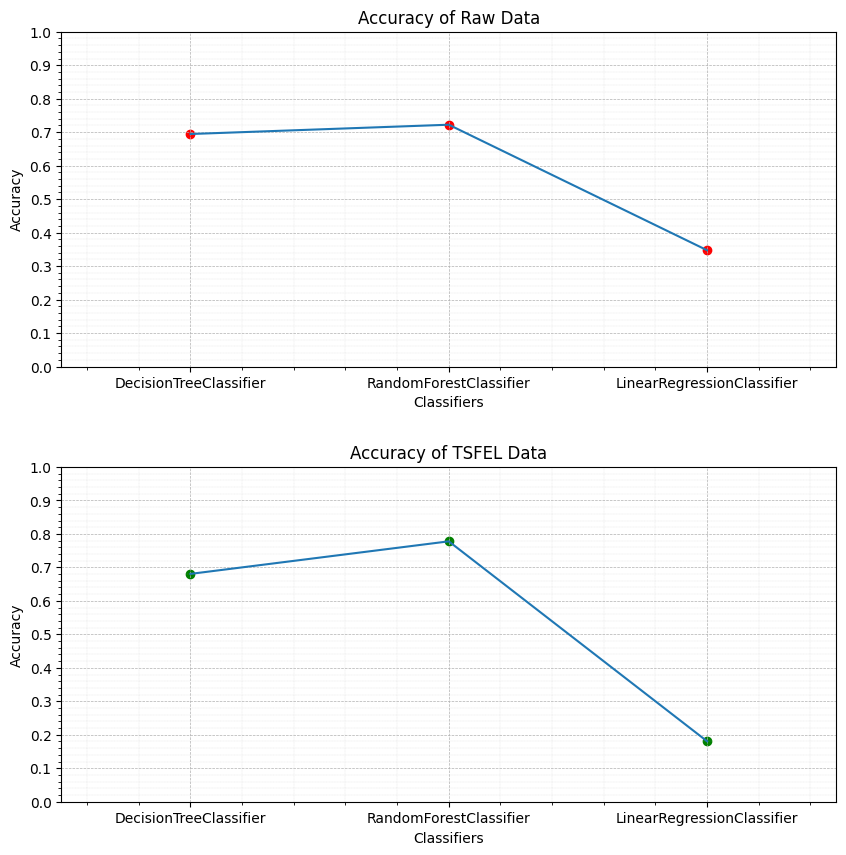

In [11]:
# Plotting the Accuracy Performance of Raw and TSFEL Data
from numpy import spacing


plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.plot(range(3), accuracy_score_raw)
plt.scatter(range(3), accuracy_score_raw, color='red')
plt.title('Accuracy of Raw Data')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xlim(-0.5, 2.5)
plt.xticks(range(3), accuracy_label)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.minorticks_on()
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.grid(True, which='minor', linestyle=':', linewidth=0.2)

plt.subplot(2,1,2)
plt.plot(range(3), accuracy_score_tsfel)
plt.scatter(range(3), accuracy_score_tsfel, color='green')
plt.title('Accuracy of TSFEL Data')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.xlim(-0.5, 2.5)
plt.ylim(0, 1)
plt.xticks(range(3), accuracy_label)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.minorticks_on()
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.grid(True, which='minor', linestyle=':', linewidth=0.2)
plt.subplots_adjust(hspace=0.3)

plt.savefig("./Figures/Q6.Accuracy_Performance_Raw_TSFEL.pdf", bbox_inches='tight')
plt.show()

# increase subplot spacing

#### $Q.$ Is the usage of ***Linear Regression Model*** for ***classification*** justified? Why or Why not?

#### $Ans.$ <p align="justify"> <b><i>No, the usage of Linear regression is not justified for classification tasks</b></i>. As we can see in the above example, first of all the linear regression model predicts values for newer data in a bigger range that can go above and below the range of the target variables on which it was trained which is not expected from a well trained classification model and even after we clip the results of the linear regression model between the desired range, the predicted values that lie between the target values are not discrete. When we rounded the predicted values to the nearest integer, the accuracy of the linear regression model droped below that of the decision tree and random forest models.<br> <b><i>Hence, the usage of Linear Regression Model for classification is not justified.</b></i></p>